In [1]:
# compare allbasin results with one basin results

In [2]:
import sys, os, glob, pickle, toml, json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

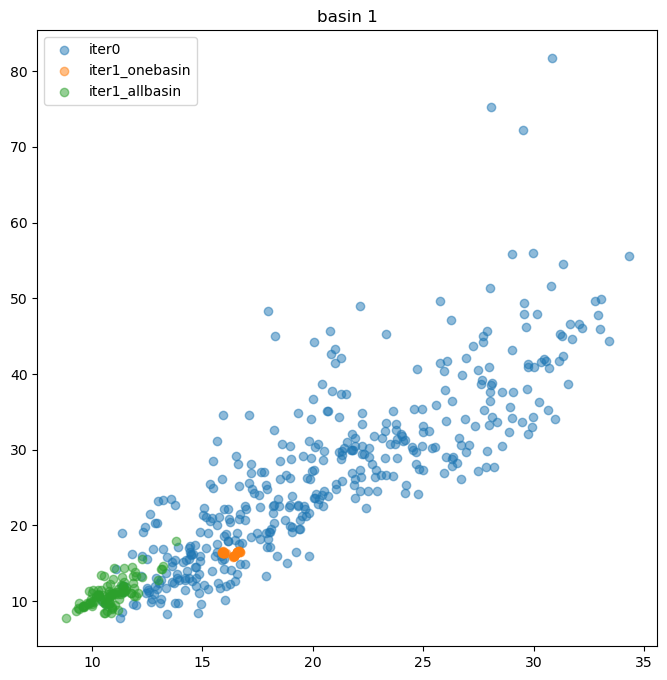

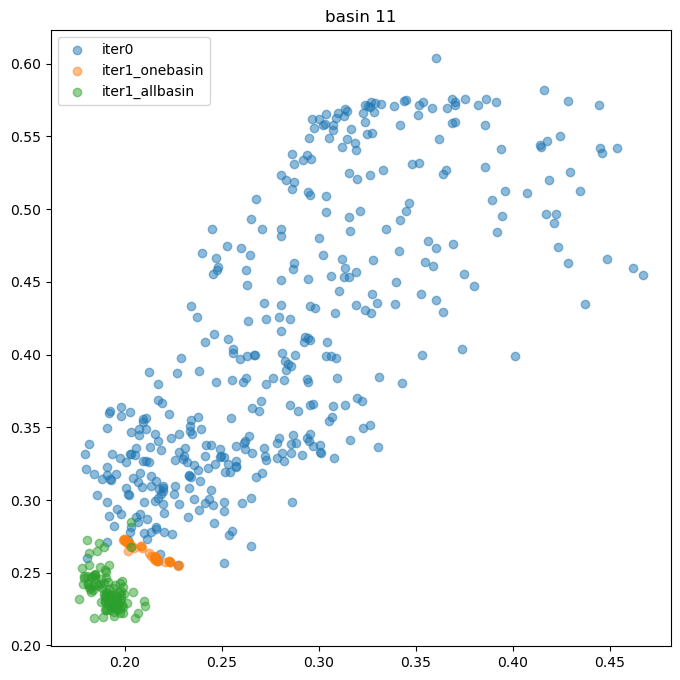

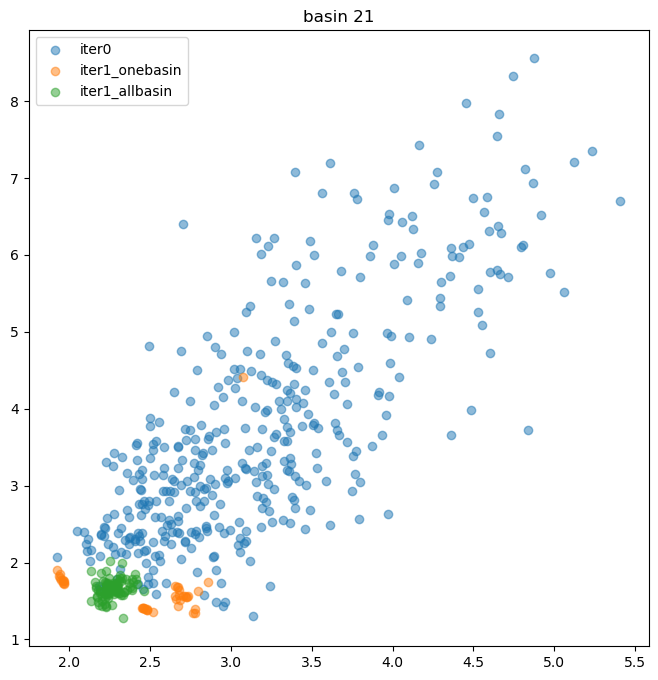

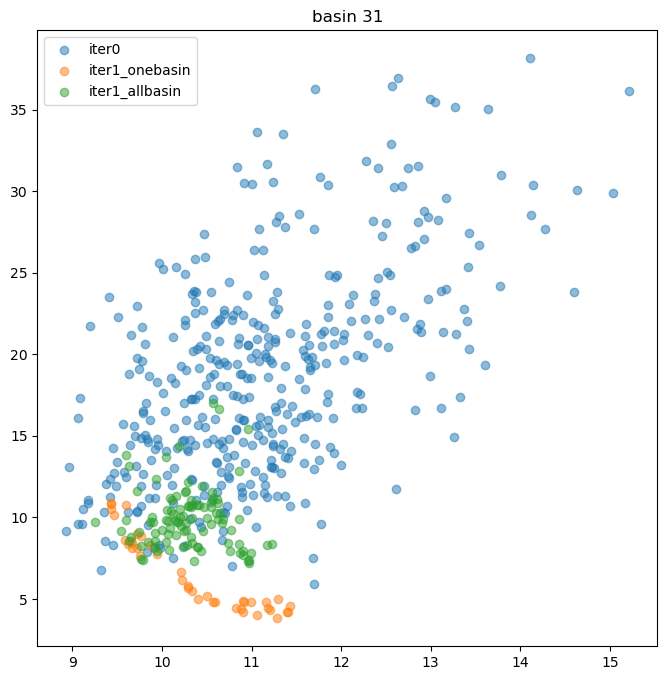

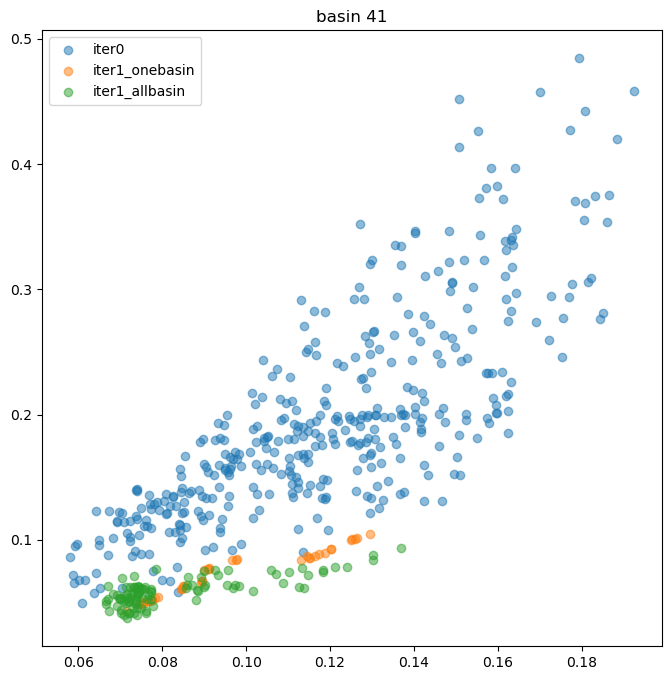

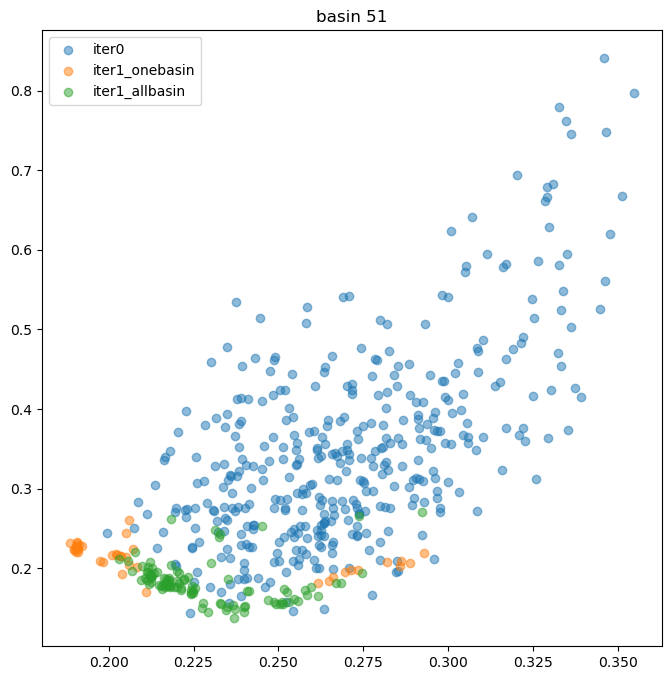

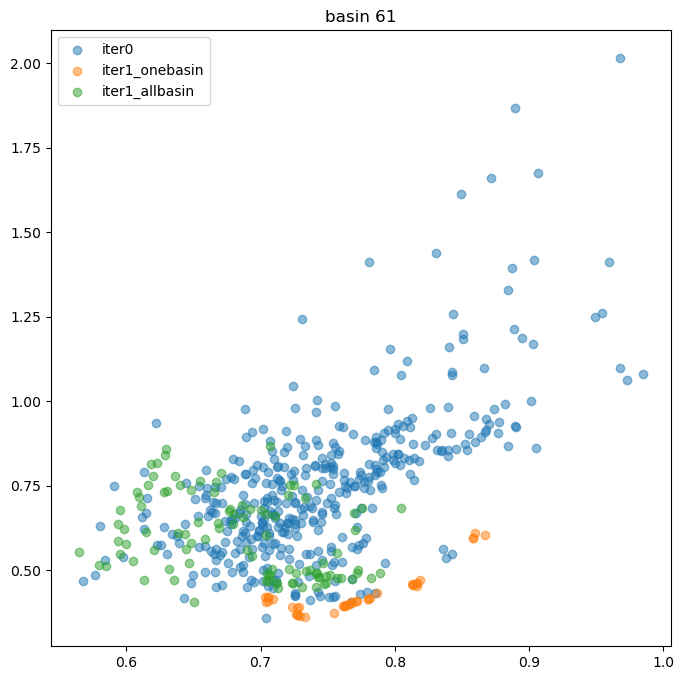

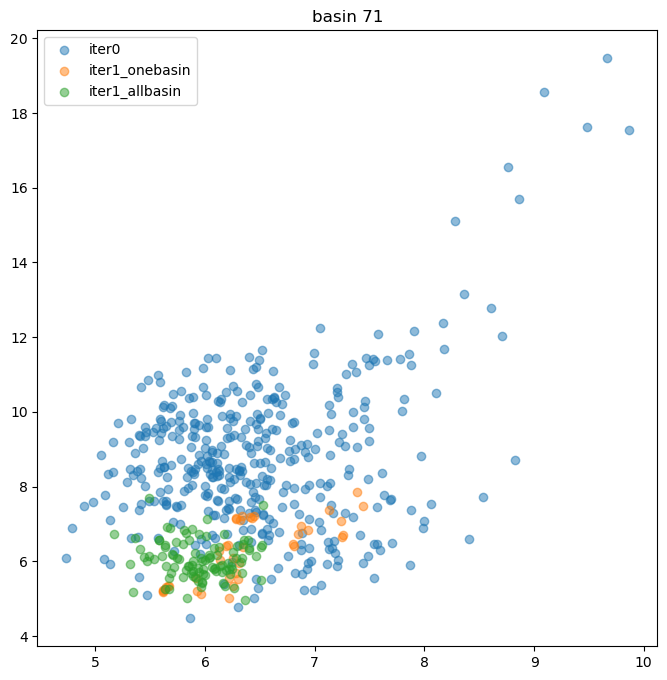

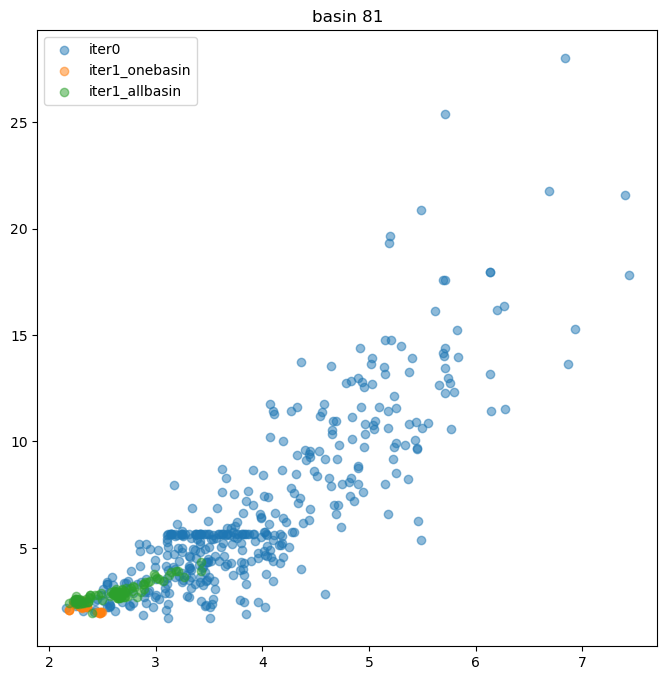

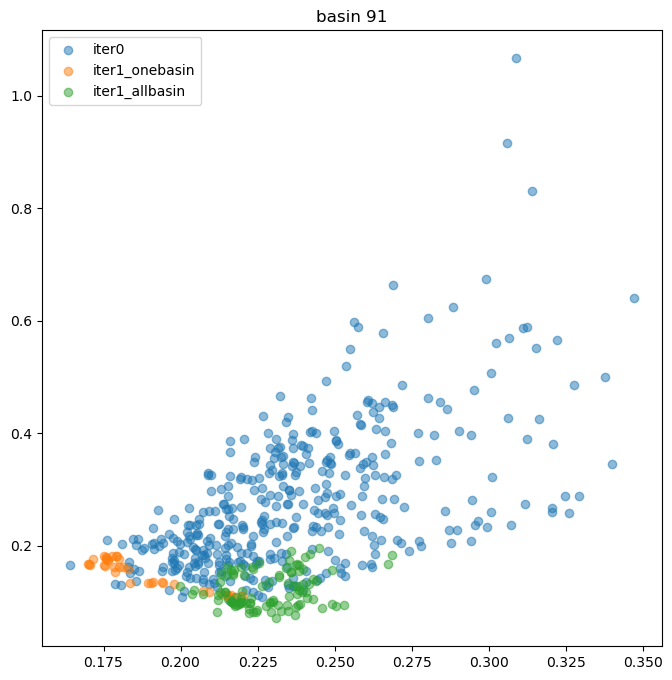

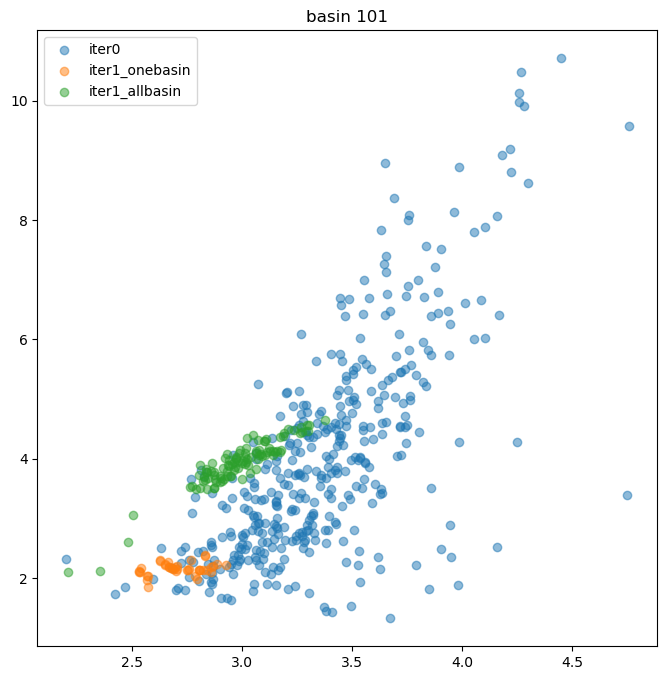

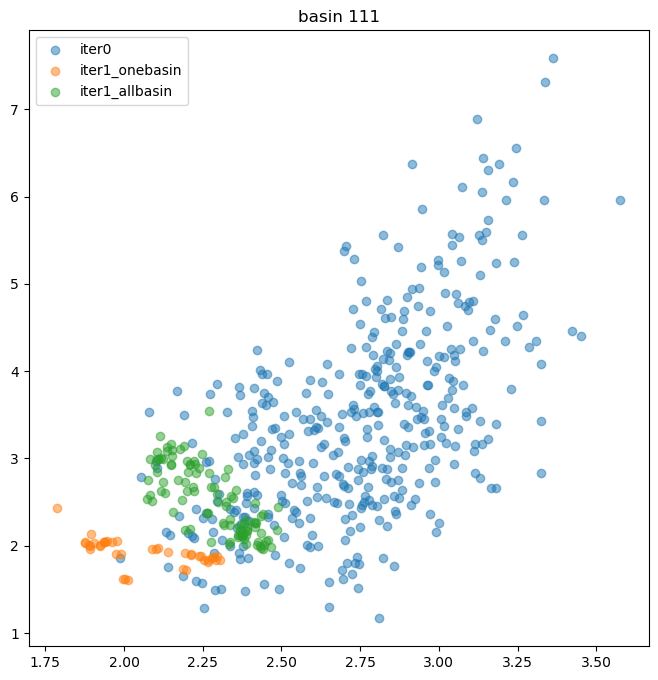

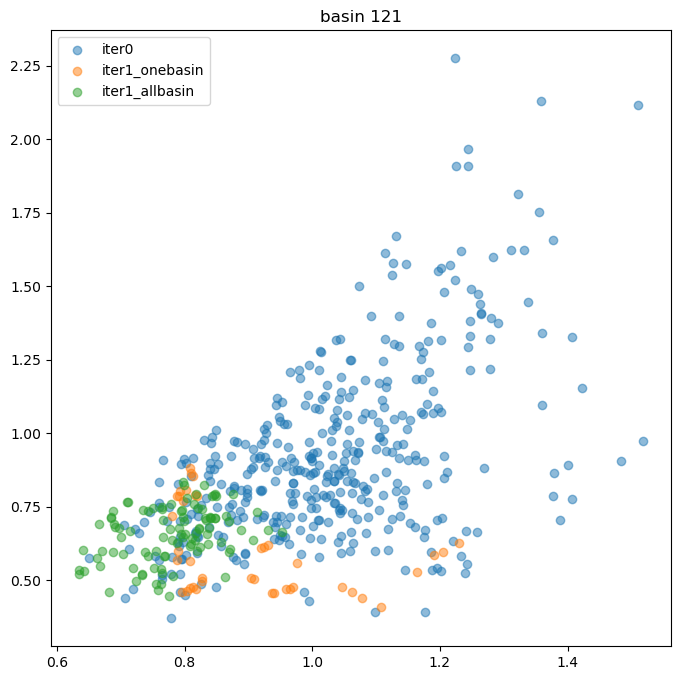

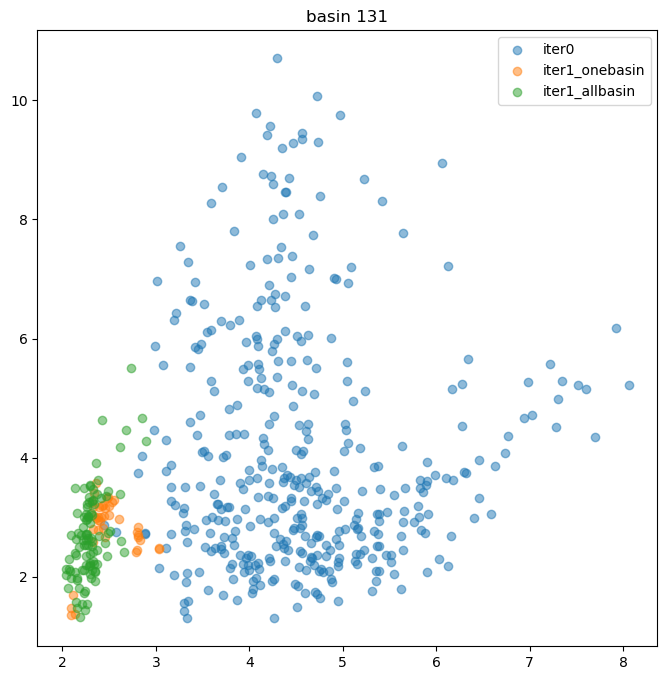

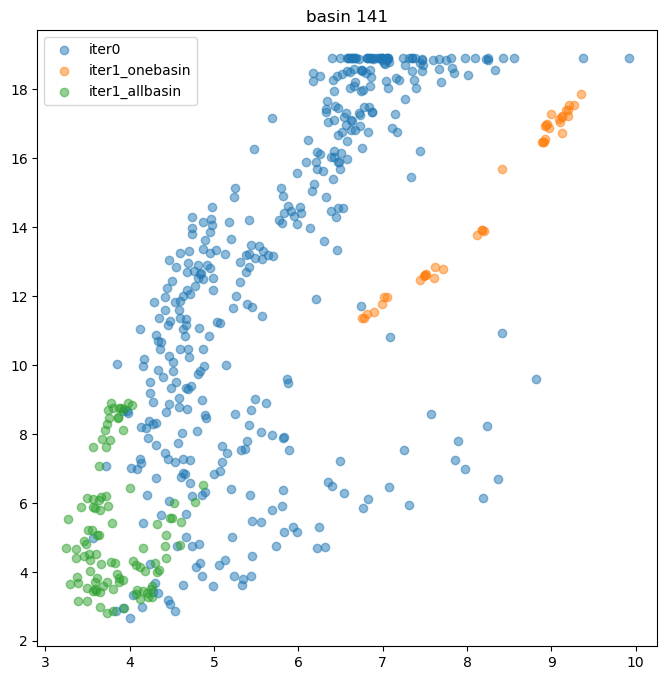

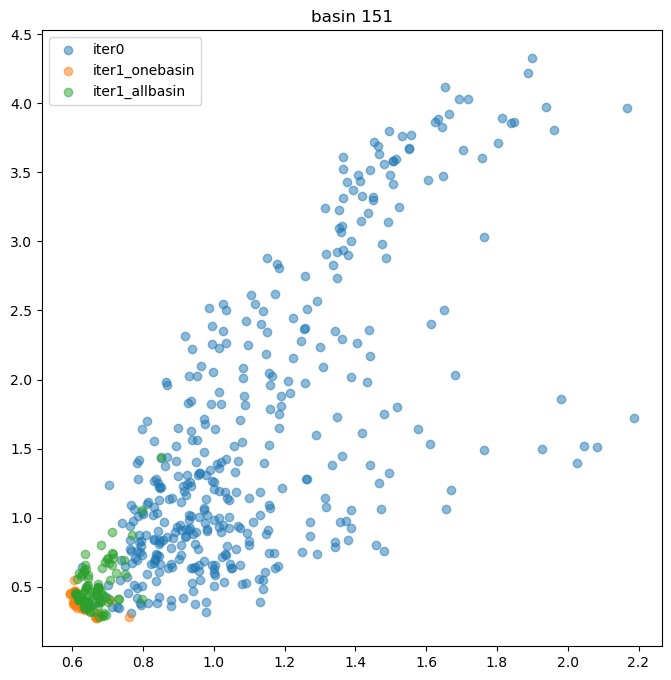

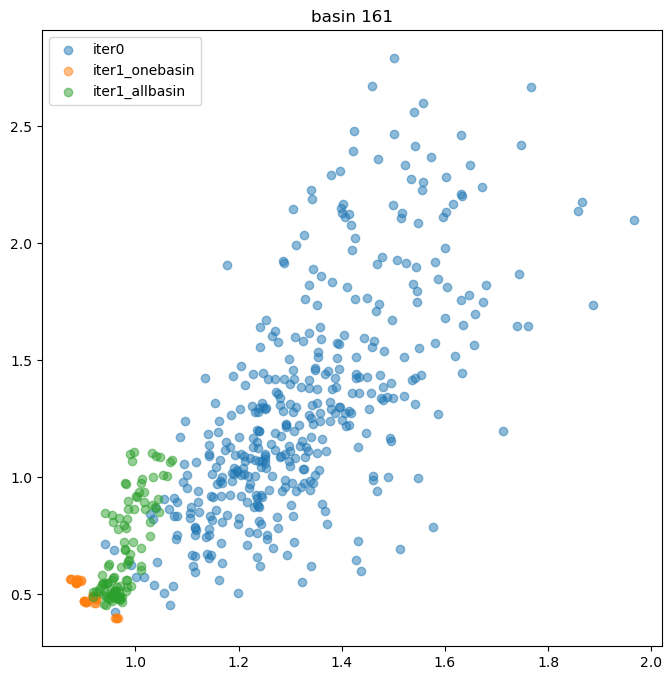

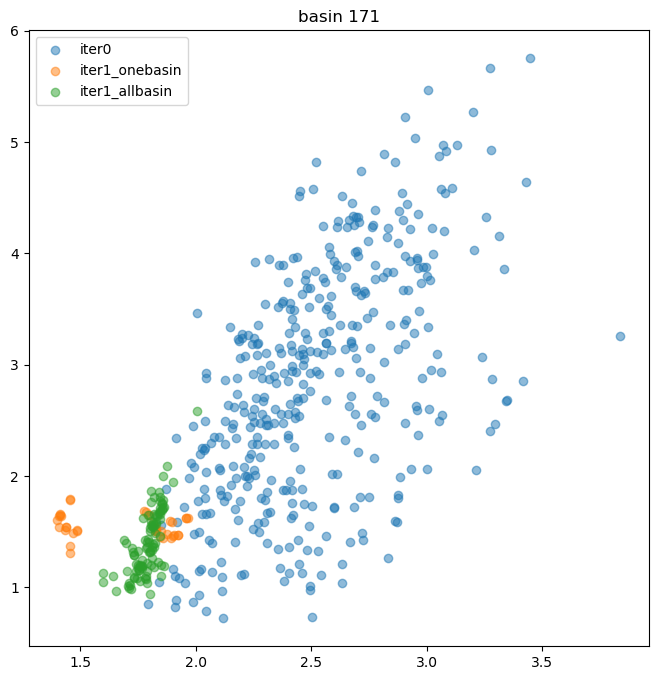

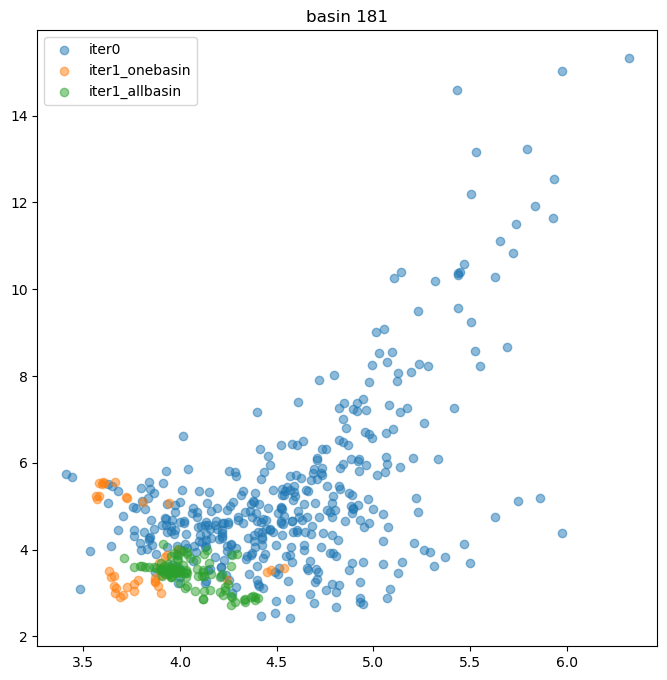

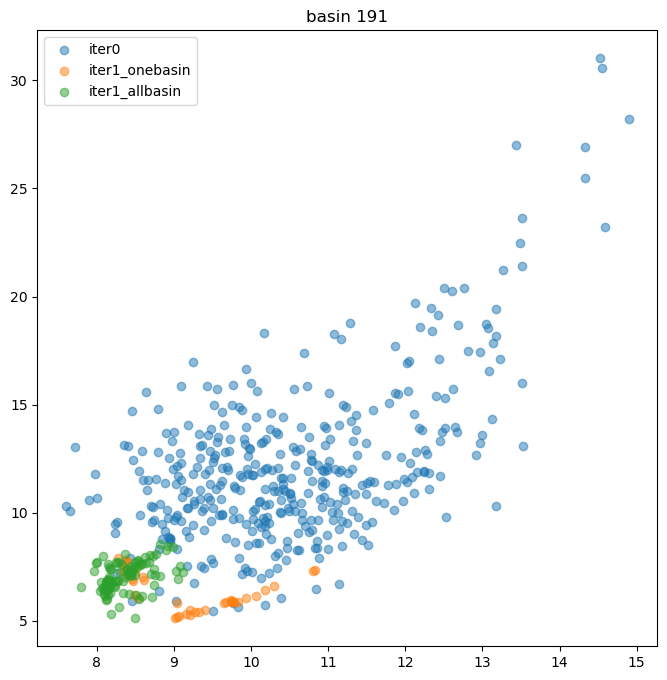

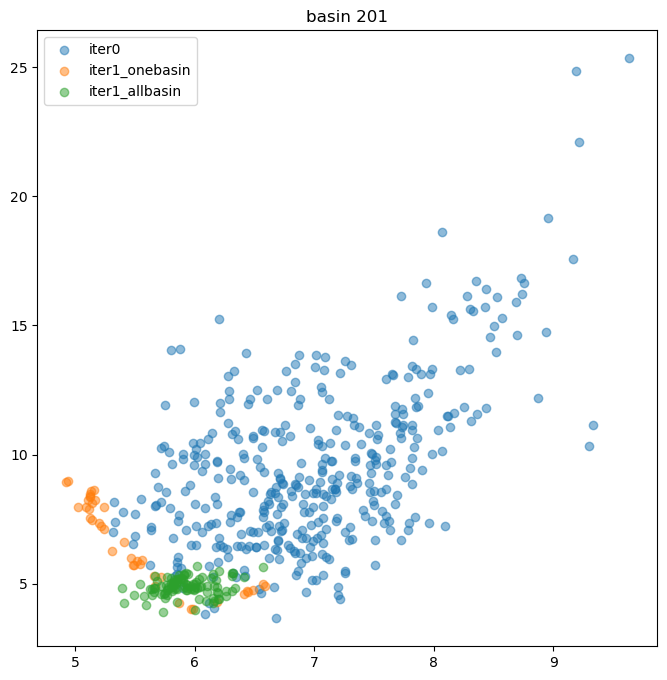

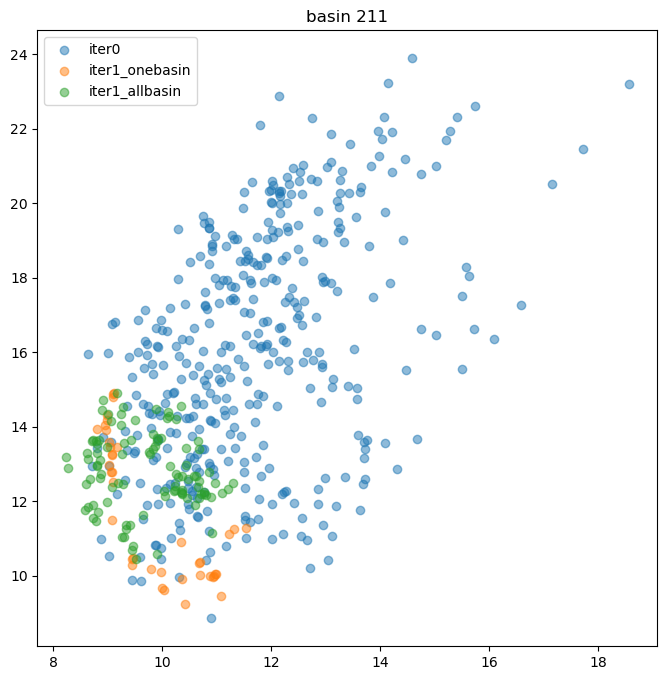

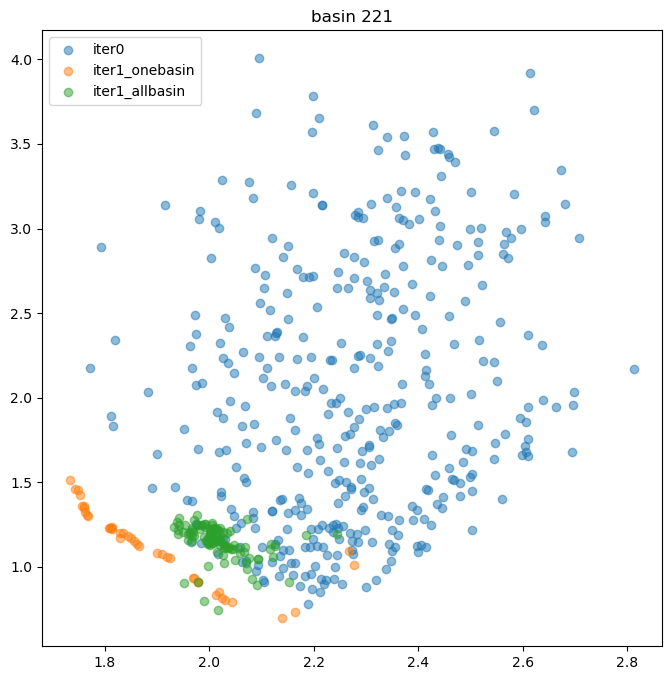


KeyboardInterrupt



In [3]:

for tarbasin in range(1, 627, 10):
    
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    
    df_iter0 = pd.read_csv(infile1)
    df_iter1_ob = pd.read_csv(infile2)
    df_iter1_ab = pd.read_csv(infile3)
    
    # compare two error metrics
    labels = ['iter0', 'iter1_onebasin', 'iter1_allbasin']
    data = [df_iter0, df_iter1_ob, df_iter1_ab]
    
    fig = plt.figure(figsize=[8, 8])
    for i in range(3):
        plt.scatter(data[i]['mae'], data[i]['max_mon_abs_err'], alpha=0.5, label=labels[i])
    plt.title(f'basin {tarbasin}')
    plt.legend()
    plt.show()

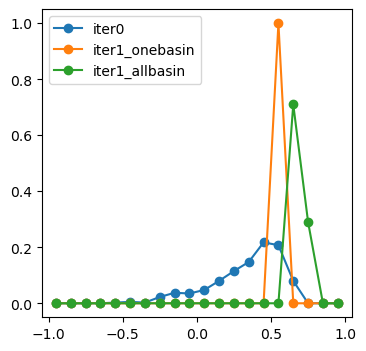

In [4]:
# Compare KGE'

import numpy as np

def calculate_probability(data, bins):
    # Compute the histogram
    counts, bin_edges = np.histogram(data, bins=bins)
    
    # Calculate the total number of data points
    total_count = len(data)
    
    # Compute the probabilities
    probabilities = counts / total_count
    
    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    return bin_centers, probabilities

labels = ['iter0', 'iter1_onebasin', 'iter1_allbasin']
data = [df_iter0, df_iter1_ob, df_iter1_ab]

fig = plt.figure(figsize=[4, 4])
for i in range(3):
    # plt.hist(data[i]['kge'], alpha=0.5, density=True, label=labels[i])
    d1, d2 = calculate_probability(data[i]['kge'].values, np.arange(-1, 1.1, 0.1))
    plt.plot(d1, d2, 'o-', label=labels[i])
    
plt.legend()
plt.show()

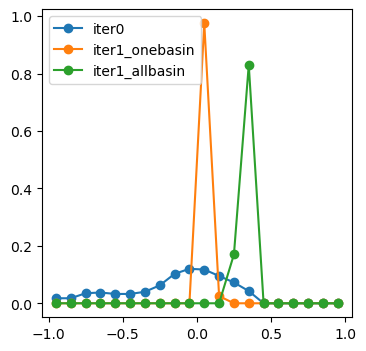

In [5]:
# Compare KGE'

import numpy as np

def calculate_probability(data, bins):
    # Compute the histogram
    counts, bin_edges = np.histogram(data, bins=bins)
    
    # Calculate the total number of data points
    total_count = len(data)
    
    # Compute the probabilities
    probabilities = counts / total_count
    
    # Calculate the bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    return bin_centers, probabilities

labels = ['iter0', 'iter1_onebasin', 'iter1_allbasin']
data = [df_iter0, df_iter1_ob, df_iter1_ab]

fig = plt.figure(figsize=[4, 4])
for i in range(3):
    # plt.hist(data[i]['kge'], alpha=0.5, density=True, label=labels[i])
    d1, d2 = calculate_probability(data[i]['nse'].values, np.arange(-1, 1.1, 0.1))
    plt.plot(d1, d2, 'o-', label=labels[i])
    
plt.legend()
plt.show()

In [6]:
# compare all KGE

bestkge = []
bestmae = []
bestmaxme = []

for tarbasin in range(1, 627, 10):
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_emutest/iter1_many_metric.csv'
    
    df_iter0 = pd.read_csv(infile1)
    df_iter1_ob = pd.read_csv(infile2)
    df_iter1_ab = pd.read_csv(infile3)

    bestkge.append([ df_iter0['kge'].max(), df_iter1_ob['kge'].max(), df_iter1_ab['kge'].max()])
    bestmae.append([ df_iter0['mae'].min(), df_iter1_ob['mae'].min(), df_iter1_ab['mae'].min()])
    bestmaxme.append([ df_iter0['max_mon_abs_err'].min(), df_iter1_ob['max_mon_abs_err'].min(), df_iter1_ab['max_mon_abs_err'].min()])

In [8]:
bestkge = np.array(bestkge)
print(bestkge.shape)

# plt.plot(bestkge)
# plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
# plt.ylim(0, 1)
# plt.show()

bestkge = np.array(bestkge)
print('median bestkge iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestkge,axis=0))
print('mean bestkge iter0/iter1_onebasin/iter1_allbasin', np.nanmean(bestkge,axis=0))
print('iter1_onebasin better than iter0', np.sum(bestkge[:,1]>bestkge[:,0]) / bestkge.shape[0])
print('iter1_allbasin better than iter0', np.sum(bestkge[:,2]>bestkge[:,0]) / bestkge.shape[0])


bestmae = np.array(bestmae)
print('median bestmae iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestmae,axis=0))
print('mae: iter1_onebasin better than iter0', np.sum(bestmae[:,1]<bestmae[:,0]) / bestmae.shape[0])
print('mae: iter1_allbasin better than iter0', np.sum(bestmae[:,2]<bestmae[:,0]) / bestmae.shape[0])

bestmaxme = np.array(bestmaxme)
print('median bestmaxme iter0/iter1_onebasin/iter1_allbasin', np.nanmedian(bestmaxme,axis=0))
print('max_montherr: iter1_onebasin better than iter0', np.sum(bestmaxme[:,1]<bestmaxme[:,0]) / bestmaxme.shape[0])
print('max_montherr: iter1_allbasin better than iter0', np.sum(bestmaxme[:,2]<bestmaxme[:,0]) / bestmaxme.shape[0])

(63, 3)
median bestkge iter0/iter1_onebasin/iter1_allbasin [0.49535038 0.32623319 0.51990107]
mean bestkge iter0/iter1_onebasin/iter1_allbasin [0.45440748 0.27462357 0.49379489]
iter1_onebasin better than iter0 0.23809523809523808
iter1_allbasin better than iter0 0.8412698412698413
median bestmae iter0/iter1_onebasin/iter1_allbasin [1.81942626 1.73383508 1.93356075]
mae: iter1_onebasin better than iter0 0.3333333333333333
mae: iter1_allbasin better than iter0 0.38095238095238093
median bestmaxme iter0/iter1_onebasin/iter1_allbasin [1.43382381 1.856449   1.68460671]
max_montherr: iter1_onebasin better than iter0 0.2698412698412698
max_montherr: iter1_allbasin better than iter0 0.49206349206349204


In [ ]:
fig = plt.figure(figsize=[10,4])

fig.add_subplot(1,3,1)
plt.plot(bestkge)
plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
plt.yscale('log')

fig.add_subplot(1,3,2)
plt.plot(bestmae)
plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
plt.yscale('log')

fig.add_subplot(1,3,3)
plt.plot(bestmaxme)
plt.legend(['iter0', 'iter1_onebasin', 'iter1_allbasin'])
plt.yscale('log')

plt.tight_layout()
plt.show()